<a href="https://colab.research.google.com/github/arwendy123/customer-segmentation-analysis/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation and Marketing Analysis for Retail Store

This project applies unsupervised clustering techniques to analyze customer data from a supermarket company. The goal is to create customer segments that can reveal different shopping behavior patterns and product preferences. Thus, recommendations that match the needs and wants of each customer group can be provided, as well as increasing customer loyalty and satisfaction.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [ ]:
# Import numpy library for arithmetic operations
import numpy as np

# Import pandas library for dataframe operations
import pandas as pd

# Import matplotlib and seaborn libraries for visualization
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns

# Import Axes3D library for 3D visualization
from mpl_toolkits.mplot3d import Axes3D

# Import datetime library for time-related operations
import datetime

# Import LabelEncoder library for converting categorical values to numeric
from sklearn.preprocessing import LabelEncoder

# Import StandardScaler library for scaling column values to eliminate scale differences
from sklearn.preprocessing import StandardScaler

# Import PCA library for extracting important features from a dataset
from sklearn.decomposition import PCA

# Import KElbowVisualizer library for implementing the elbow method to choose the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer

# Import KMeans library for performing data clustering using the K-means method
from sklearn.cluster import KMeans

# Import AgglomerativeClustering library for performing data clustering using the bottom-up approach
from sklearn.cluster import AgglomerativeClustering

# Import metrics library for implementing evaluation functions to assess prediction errors
from sklearn import metrics

# Disable Python warnings
import warnings
warnings.filterwarnings("ignore")

# Set random seed
np.random.seed(42)

## Loading the Dataset

In [ ]:
# Load the dataset and display the data
data = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
print(f'Number of Data: {len(data)}')
display(data.head())

Number of Data: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
# View detailed information about the DataFrame structure using the info() function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

*   The dataset is loaded using the read_csv() function from pandas, and the number of data entries is displayed.
*   The structure of the dataset is displayed using the head() function to show the first few rows of data, and the info() function provides information about the columns and data types.



The data.info() function provides detailed information about the DataFrame structure. Here are some key observations:

* Missing Values: The Income column has missing values. These missing values need to be handled before proceeding with the analysis.

* Data Type: The Dt_Customer column, which represents the date when customers joined the database, is currently of object type. Converting it into a DateTime format would be more useful for further analysis and manipulation.

* Categorical Features: The DataFrame contains several categorical features, as indicated by the object data type. These features will need to be encoded into numerical form later on for modeling purposes.

In [ ]:
# Removing missing values
data = data.dropna(subset=['Income'])
print(f'The number of data after removing rows with missing values is: {len(data)}')

The number of data after removing rows with missing values is: 2216


Next, a new feature called "Customer_For" will be created to represent the number of days each customer has been registered in the company's database. This will be calculated by subtracting the customer's registration date from the latest recorded date.

By capturing the duration of customer registration, valuable insights can be gained into their loyalty and engagement with the company. Customers who have been registered for a longer period may exhibit a stronger connection and potentially have a higher lifetime value. On the other hand, new customers may require targeted marketing strategies to ensure their retention and satisfaction.

The calculation of the duration in days allows for standardization of the feature and facilitates comparison across different customers.

In [ ]:
# Convert the "Dt_Customer" column to datetime format
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

# Extract the date part from the "Dt_Customer" column
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

# Find the latest and oldest registration dates in the dataset
latest_date = max(dates)
oldest_date = min(dates)

# Print the latest and oldest registration dates
print(f'Latest registration date in the records: {latest_date}')
print(f'Oldest registration date in the records: {oldest_date}')

Latest registration date in the records: 2014-12-06
Oldest registration date in the records: 2012-01-08


Create the "Customer_For" feature representing the number of days since the customer registered relative to the latest recorded date

In [ ]:
# Create the "Customer_For" feature
days = []
d1 = max(dates) # set it as the latest customer
for i in dates:
    delta = d1 - i # calculate the difference between the latest date and each date
    days.append(delta)
data["Customer_For"] = days # assign the calculated differences to the "Customer_For" feature
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce") # convert the values to numeric type

After that, the unique values in categorical features will be explored to gain a clear understanding of the data.

In [ ]:
print("Total categories in the Marital_Status feature:\n\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the Education feature:\n\n", data["Education"].value_counts())

Total categories in the Marital_Status feature:

 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the Education feature:

 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


## Feature Engineering

In the next step, the following feature engineering tasks will be performed:

1. Extract "Age" from the "Year_Birth" column, which represents the birth year of the customers.

2. Create another feature "Spent" that indicates the total amount spent by customers in various categories over a two-year period.

3. Create another feature "Living_With" from the "Marital_Status" column to extract the living situation of couples.

4. Create a feature "Children" to indicate the number of children in the household, including kids and teenagers.

5. Create a feature "Family_Size" to provide further clarity on the household size.

6. Create a feature "Is_Parent" to indicate the parental status of the customers.

7. Lastly, the "Education" column will be simplified by creating three categories based on its values.

Some redundant or excessive features will be dropped as well.

In [ ]:
# Feature Engineering

# Customer's age today
data['Age'] = 2023 - data['Year_Birth']

# Total expenditure for various items
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] +\
                data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# Living situation based on marital status "Alone"
data["Living_With"] = data["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Absurd": "Alone",
    "Widow": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Single": "Alone"
})

# Feature indicating the number of children living in the household
data["Children"] = data["Kidhome"] + data["Teenhome"]

# Feature for total household members
data["Family_Size"] = data["Living_With"].replace({"Alone":1,
                                                  "Partner": 2}) + data["Children"]

# Feature related to being a parent
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)

# Segmentation of education level into three groups
data["Education"] = data["Education"].replace({
    "Basic": "Undergraduate",
    "2nd Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})

# Renaming some product-related features for clarity
data = data.rename(columns={
    "MntWines": "Wines",
    "MntFruits": "Fruits",
    "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish",
    "MntSweetProducts": "Sweets",
    "MntGoldProds": "Gold",
})

# Dropping some redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

After creating several new features, let's explore the statistical summary of the data. Here's a description of the features:

In [ ]:
# Viewing the statistical summary of the numeric data
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      27.000000     5.000000     0.000000     1.000000     0.000000  
25%      46.000000    69.000000     0.000000     2.000000     0.000000  
50%      53.000000   396.500000     1.000000     3.000000     1.000000  
75%      64.000000  1048.000000     1.000000     3.000000     1.000000  
max     130.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

The statistics above reveal some differences in the average income and maximum income, as well as the maximum age. Notably, the maximum age is 128 years, which seems unrealistic considering we calculated the age based on the current year (2021) and the data is already outdated.

To gain a broader perspective of the data, let's plot some selected features. This will provide a visual representation and aid in understanding the distributions and relationships within the dataset.

Relative Plot of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

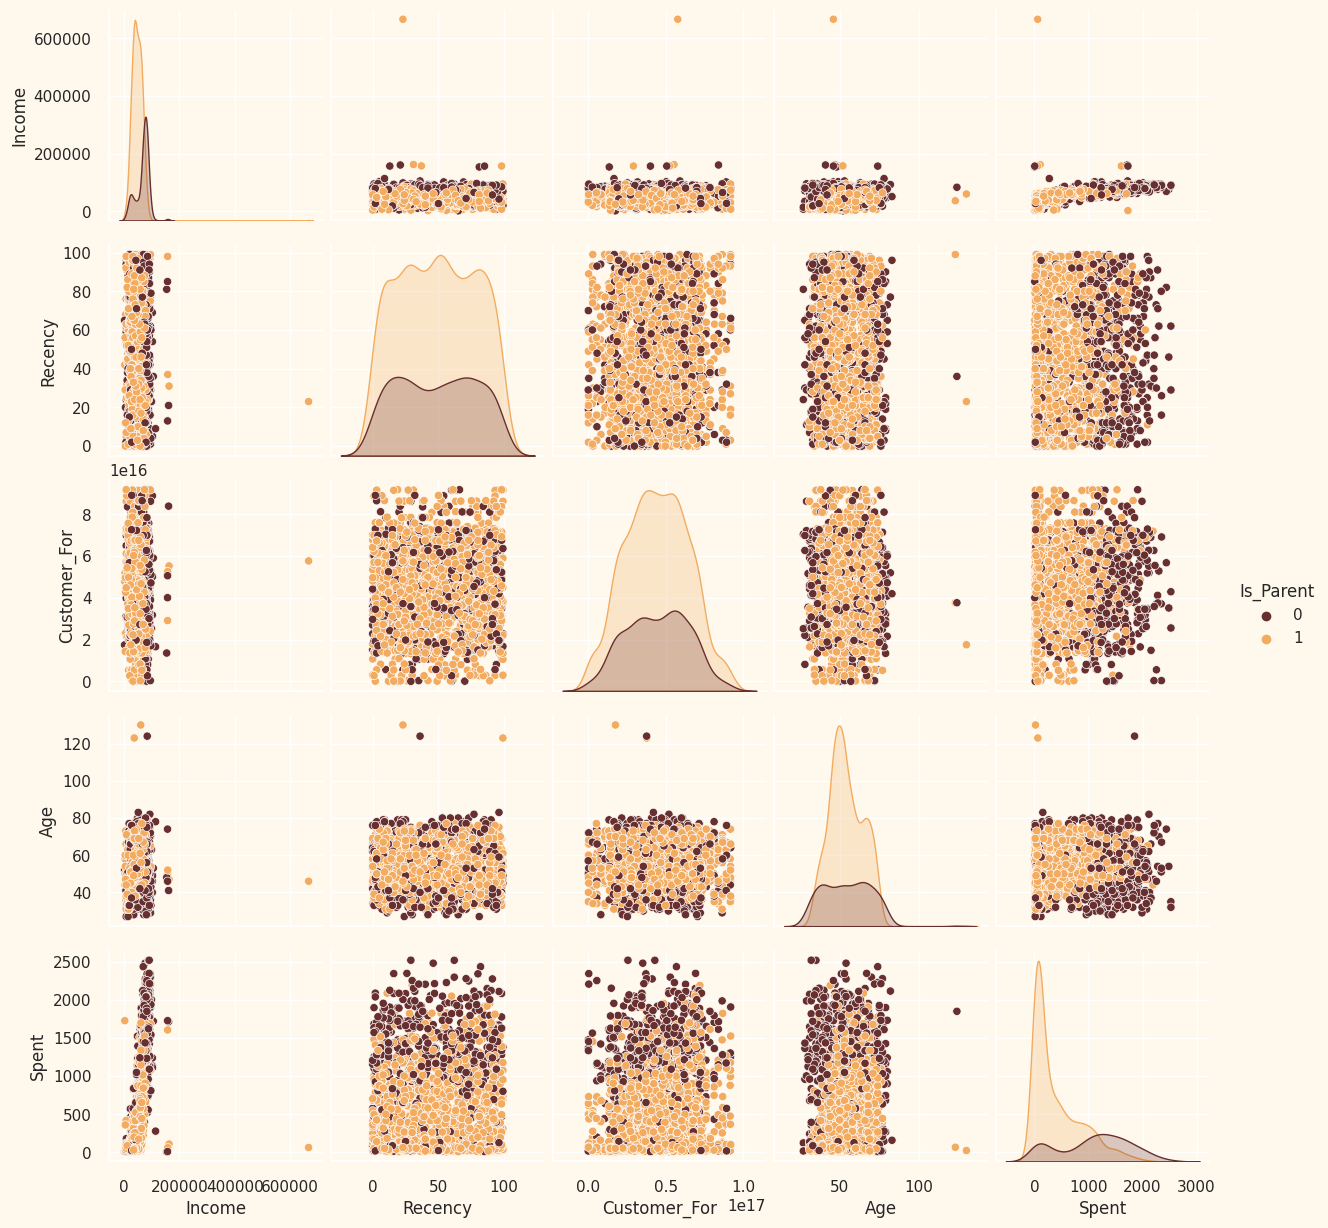

In [ ]:
# Setting up color preferences
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Plotting the features
to_plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Relative Plot of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[to_plot], hue="Is_Parent", palette=["#682F2F", "#F3AB60"])

plt.show()

From the pair plot, it is evident that there are outliers in the "Income" and "Age" features.

Outliers are data points that deviate significantly from the majority of the data points. They can have a significant impact on statistical analysis and modeling. To ensure the accuracy and reliability of our analysis and modeling results, it is necessary to remove these outliers from the dataset.

In [ ]:
# Drop outliers by setting limits on Age and Income
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("Total number of data after removing outliers:", len(data))

Total number of data after removing outliers: 2212


Next, the correlation among the features will be explored.
(Excluding categorical attributes at the moment)

This step involves calculating the correlation matrix and visualizing it using a heatmap. By examining the correlation, insights can be gained into the relationships between different numeric features in the dataset.

<Axes: >

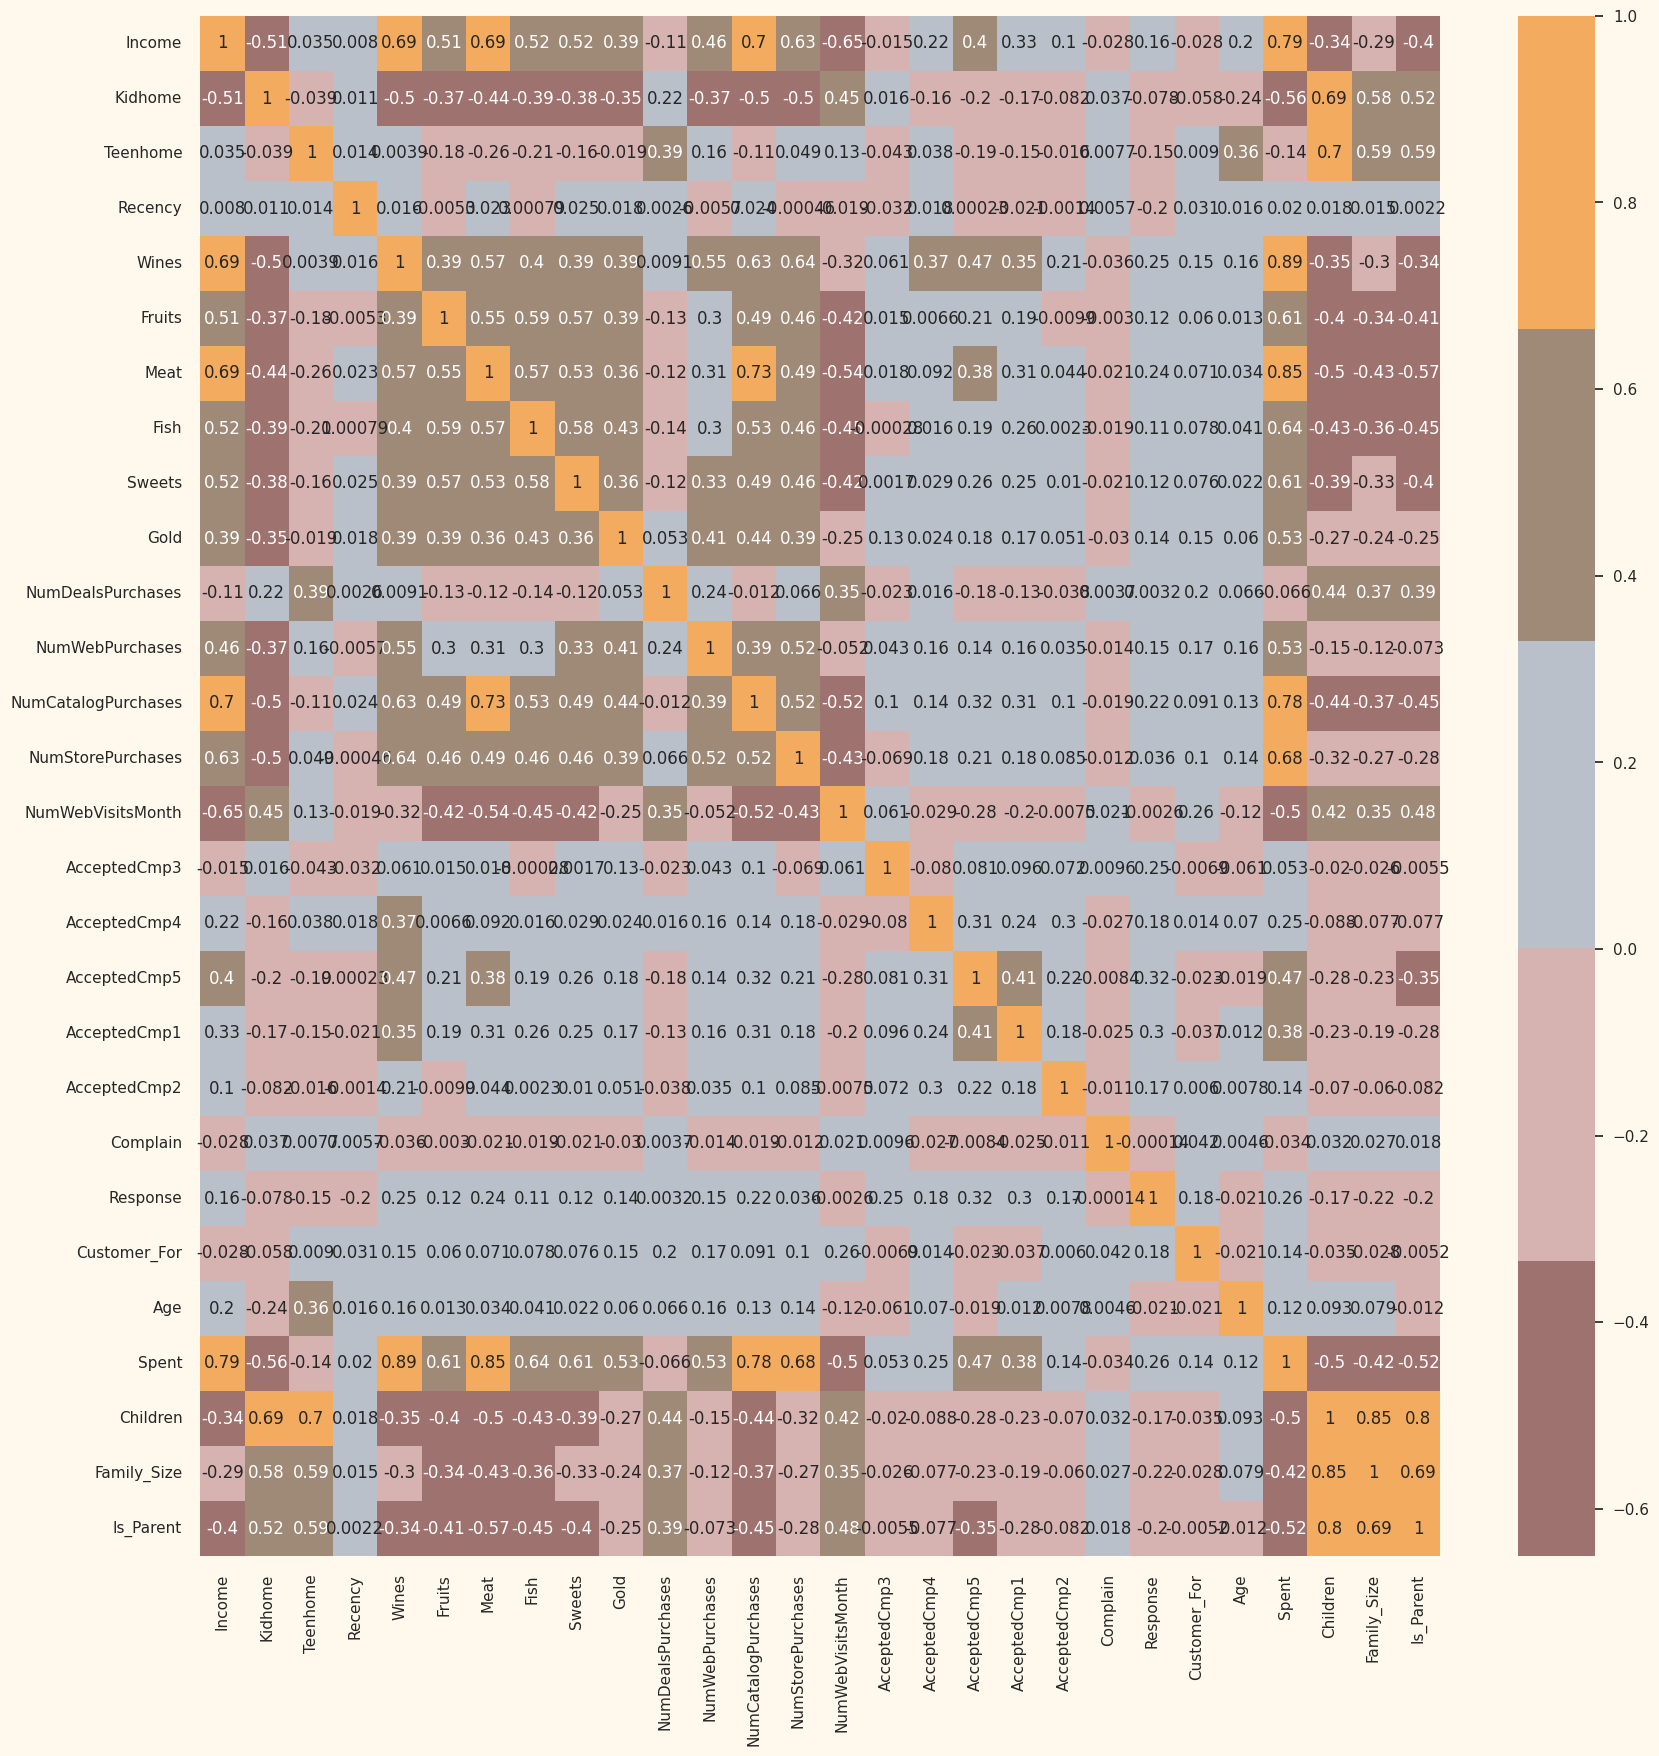

In [ ]:
# Correlation Matrix
corrmat = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)

In the data preprocessing step, several operations are performed to prepare the data for clustering:

1. Label encoding: Categorical features are encoded into numerical values using label encoding. This is done to convert categorical data into a format that can be processed by clustering algorithms.

2. Feature scaling: The features are scaled using a standard scaler. Scaling the features ensures that they are on a similar scale, which can improve the performance of clustering algorithms.

3. Dimensionality reduction: A subset dataframe is created for dimensionality reduction. This step involves reducing the number of features in the dataset while preserving important information. Dimensionality reduction techniques like PCA (Principal Component Analysis) can be applied to achieve this.

These preprocessing steps help in preparing the data for clustering analysis by transforming and optimizing the data representation.

## Data Preprocessing

In [ ]:
# Get a list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
# Label Encoding (dtypes: object)
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

print("All features are now numeric")

All features are now numeric


In [ ]:
# Make a copy of the data
ds = data.copy()

# Create a subset dataframe by removing features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

# Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
print("All features have been scaled")

All features have been scaled


In [ ]:
# Scaled data to be used for dimensionality reduction
print("DataFrame to be used for further modeling:")
scaled_ds.head()

DataFrame to be used for further modeling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.507308  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.507308 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.507308  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.507308 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.979003  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.973583  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.665144  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.172664  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.923210 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.822130 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

## Dimensionality Reduction

In the dimensionality reduction step, the number of features in the dataset is reduced to simplify the classification task. This is done to address the issues of complexity and redundancy that may arise from a high number of features. Principal Component Analysis (PCA) is employed, a technique that transforms the original features into a new set of principal components while preserving as much information as possible.

The steps involved in this section are as follows:

1. Dimensionality reduction using PCA.
2. Plotting the reduced dataset.
3. Dimensionality reduction with PCA. For this particular case, the dimensionality is reduced to 3 dimensions.

In [ ]:
# Performing PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=["col1", "col2", "col3"])
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  8.351768e-17  2.877941 -5.975088 -2.534870 -0.778886  2.378661   
col2  2212.0  2.569775e-17  1.705544 -4.231266 -1.324039 -0.174846  1.234127   
col3  2212.0  4.577411e-17  1.226421 -3.712771 -0.804733 -0.009271  0.805469   

           max  
col1  7.442387  
col2  6.197792  
col3  6.431664

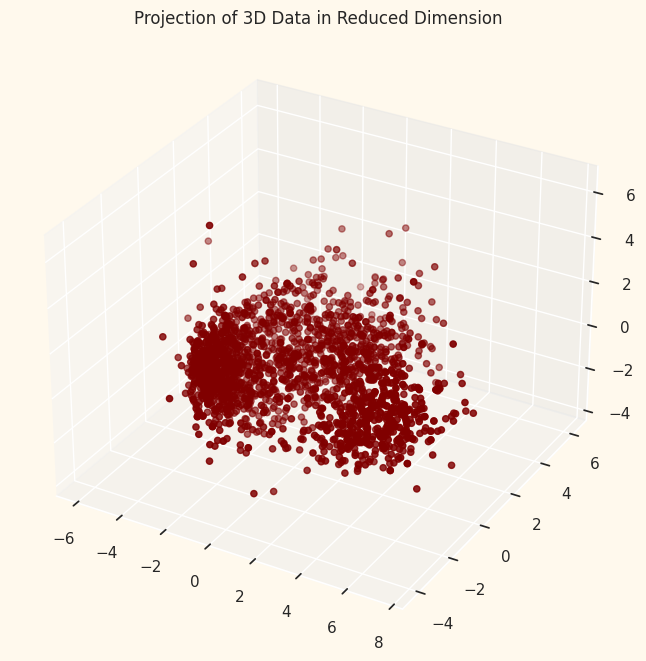

In [ ]:
# Projection of 3D Data in Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("Projection of 3D Data in Reduced Dimension")
plt.show()

## Clustering

Now that the attributes have been reduced to three dimensions, clustering will be performed using Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method that involves merging examples until the desired number of clusters is reached.

The steps involved in clustering are as follows:

1. The Elbow Method is used to determine the number of clusters to be formed.
2. Clustering is performed using Agglomerative Clustering.
3. The formed clusters can be visualized through a scatter plot.


Elbow Method to determine the number of clusters to be formed:


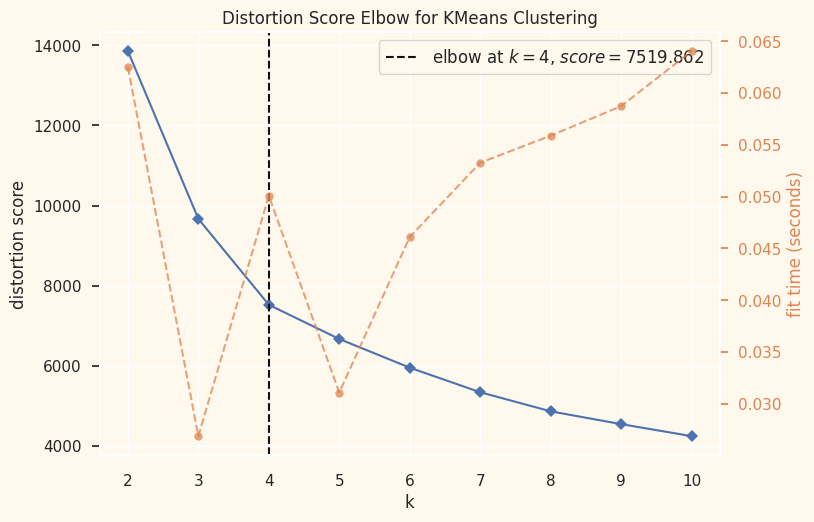

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method to Determine the Number of Clusters
print('Elbow Method to determine the number of clusters to be formed:')
elbow_visualizer = KElbowVisualizer(KMeans(), k=10)
elbow_visualizer.fit(PCA_ds)
elbow_visualizer.show()

The elbow plot suggests that four clusters would be the optimal number for this data.

Next, we will fit the Agglomerative Clustering model to obtain the final clusters. Agglomerative Clustering is a hierarchical clustering method that involves merging examples until the desired number of clusters is achieved. It starts with each example as an individual cluster and iteratively merges the most similar clusters until the desired number of clusters is reached.

In this step, we will perform Agglomerative Clustering on the reduced-dimensional data and obtain the cluster assignments for each data point.

In [ ]:
# Starting the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# Fitting the model and predicting clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# Adding the Cluster feature to the original dataframe
data["Clusters"] = yhat_AC

To visualize the formed clusters, let's examine the 3-D distribution of the clusters.

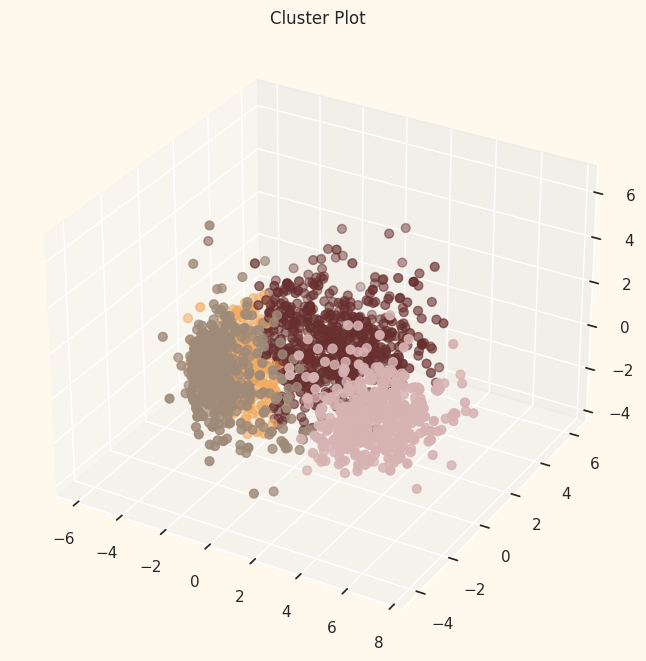

In [ ]:
# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)
ax.set_title("Cluster Plot")
plt.show()

## Evaluating the Clustering Models

To evaluate the unsupervised clustering models, the distribution of data points within each cluster is analyzed. By visualizing the data points grouped by their assigned clusters, insights can be gained into the clustering results. This allows for the identification of any patterns or trends within each cluster and an understanding of the characteristics of each cluster.

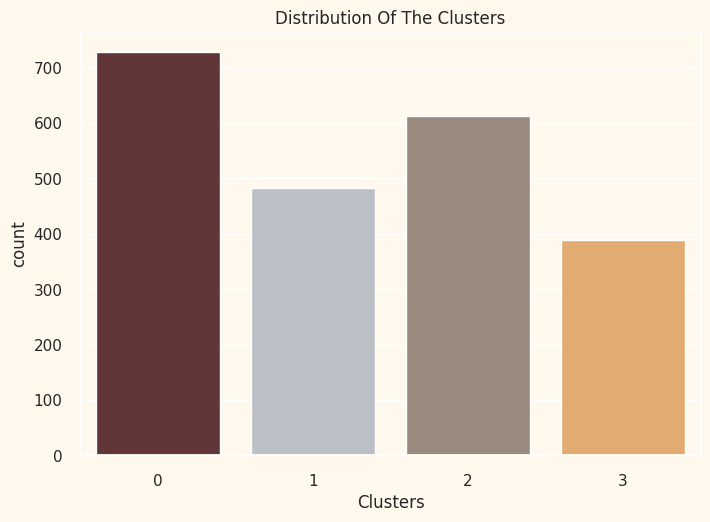

In [ ]:
# Plotting countplot of clusters
palette = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
plot = sns.countplot(x=data["Clusters"], palette=palette)
plot.set_title("Distribution Of The Clusters")
plt.show()

The countplot of the clusters shows that the clusters are reasonably distributed. Each cluster has a significant number of data points, indicating that the clustering algorithm has successfully grouped the data into distinct clusters. The distribution of the clusters suggests that there are no dominant or heavily skewed clusters, which is desirable for a balanced clustering outcome. This distribution provides a good foundation for further analysis and interpretation of the cluster characteristics.

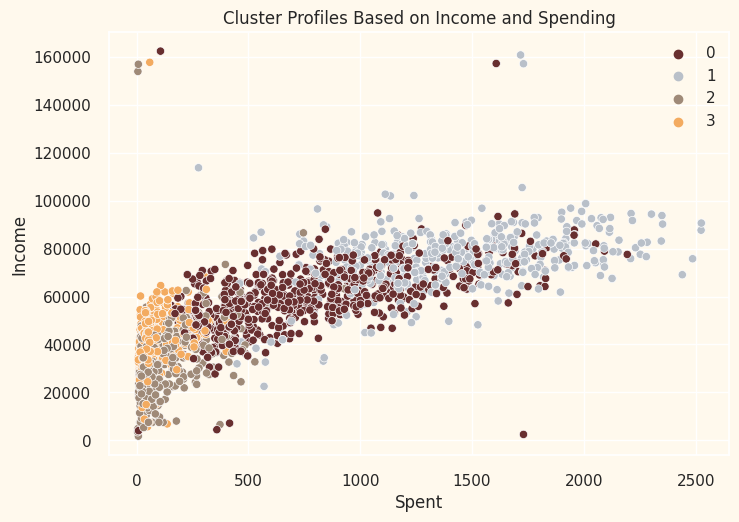

In [ ]:
pl = sns.scatterplot(data=data, x=data["Spent"], y=data["Income"], hue=data["Clusters"], palette=palette)
pl.set_title("Cluster Profiles Based on Income and Spending")
plt.legend()
plt.show()

The Income vs Spending plot reveals distinct patterns among the clusters:

* Group 0: This cluster is characterized by high spending and average income. Customers in this group tend to spend more across various products.

* Group 1: This cluster represents customers with high spending and high income. They have the highest spending levels among all the clusters.

* Group 2: This cluster consists of customers with low spending and low income. They have the lowest spending levels among all the clusters.

* Group 3: This cluster represents customers with high spending but low income. They exhibit relatively high spending patterns despite having lower income levels.

Next, we will explore the detailed distribution of clusters based on various products in the data, namely: Wines, Fruits, Meat, Fish, Sweets, and Gold. This analysis will provide insights into how the clusters differ in their purchasing behavior for different product categories.

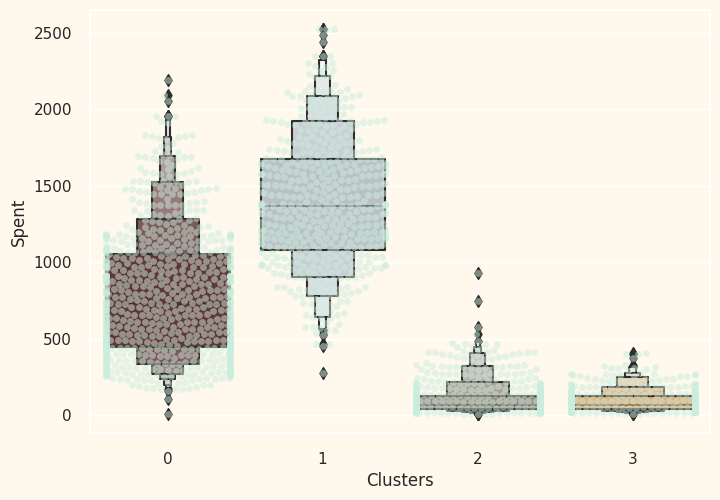

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=palette)
plt.show()

From the plot above, it is evident that cluster 1 is our largest group of customers, followed by cluster 0. We can explore the spending patterns of each cluster to devise targeted marketing strategies.

Next, let's explore the performance of our past campaigns. We will examine the response rates and success rates of each campaign.

To do this, we will create bar plots to visualize the response rates and success rates of the campaigns for each cluster.

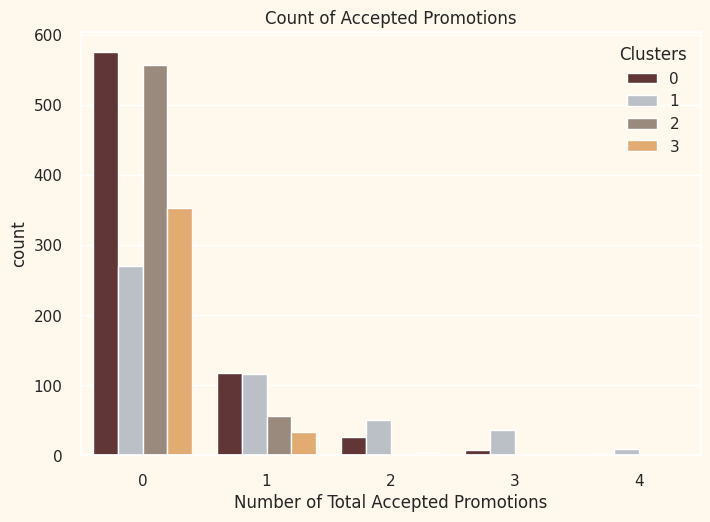

In [ ]:
# Creating a feature to calculate the total number of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

# Plotting the count of total accepted promotions
plt.figure()
pl = sns.countplot(x=data["Total_Promos"], hue=data["Clusters"], palette=palette)
pl.set_title("Count of Accepted Promotions")
pl.set_xlabel("Number of Total Accepted Promotions")
plt.show()

So far, there has not been an overwhelming response to the campaigns. There are very few participants overall, and none of them have participated in all five campaigns. It suggests that more targeted and well-planned campaigns may be needed to boost sales.

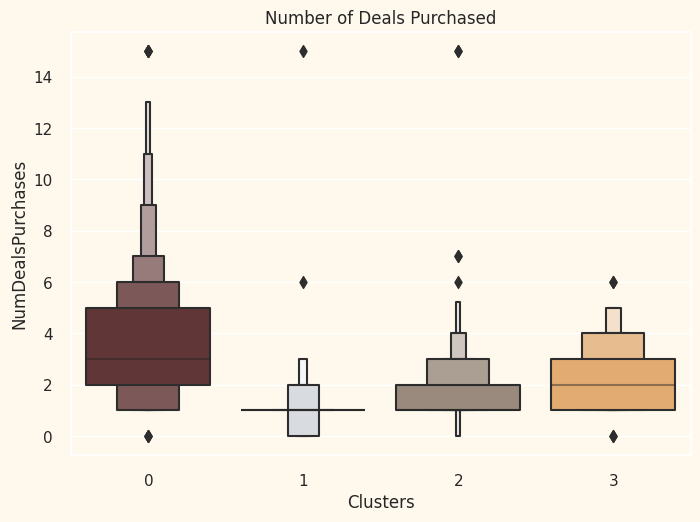

In [ ]:
# Plotting the number of deals purchased
plt.figure()
pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette=palette)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike the campaigns, the deals have performed well. They have had better results with Cluster 0 and Cluster 3. However, our standout customers from Cluster 1 do not seem to be very interested in the deals. Nothing seems to overwhelmingly attract Cluster 2.

<Figure size 800x550 with 0 Axes>

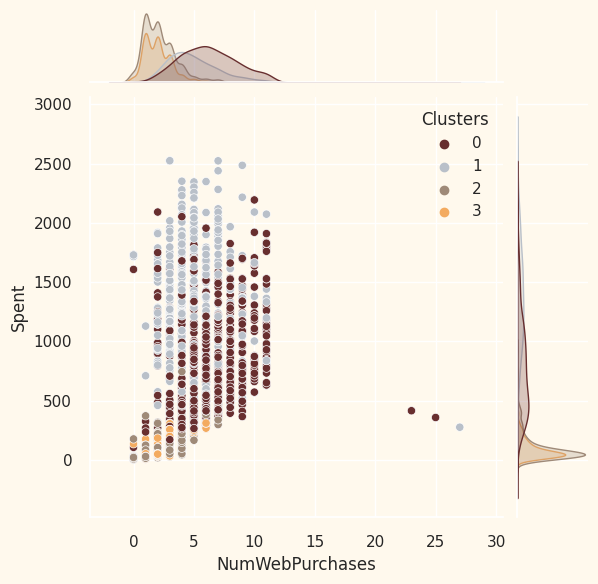

<Figure size 800x550 with 0 Axes>

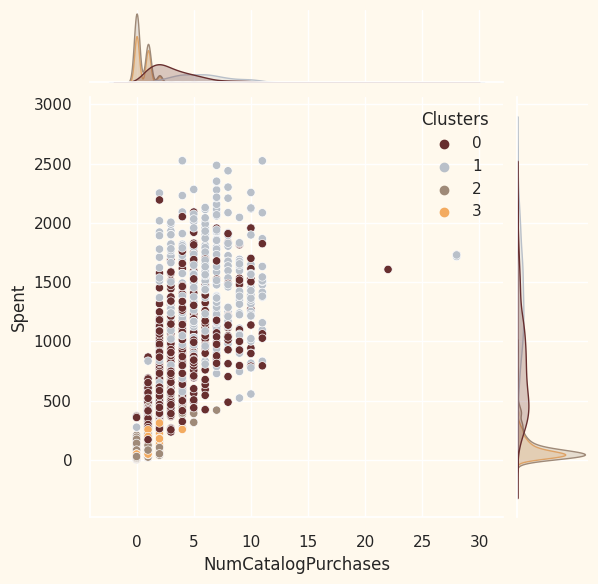

<Figure size 800x550 with 0 Axes>

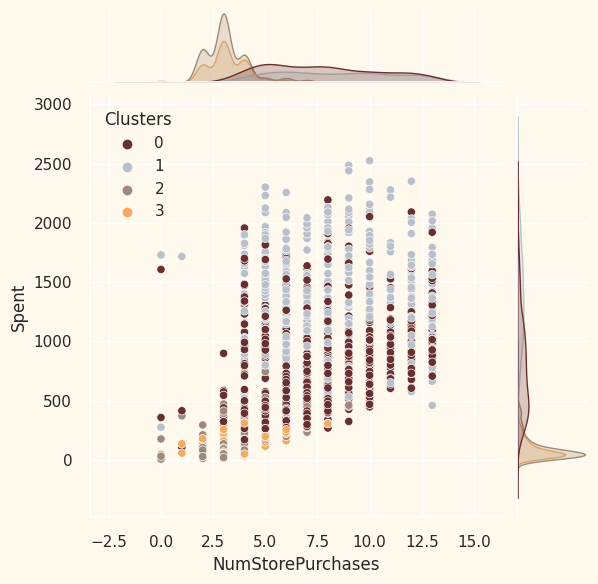

<Figure size 800x550 with 0 Axes>

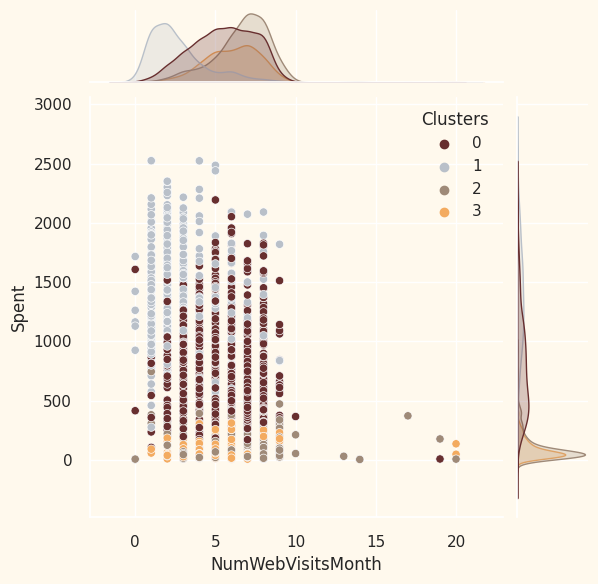

In [ ]:
# Exploring purchasing style in more detail
Places = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

# Generate joint plots for each purchasing style variable
for i in Places:
    plt.figure()
    # Plot joint distribution of the purchasing style variable and total amount spent
    sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], palette=palette)
    plt.show()

## Profiling

Now that we have formed the clusters and observed their purchasing behaviors, let's examine who is present in each cluster. To do this, we will create profiles of the formed clusters and draw conclusions about our main customers and those who require more attention from the retail marketing team.

To achieve this, we will plan several features that indicate the personal characteristics of customers within the context of the clusters they belong to. Based on the results, we will draw conclusions.

<Figure size 800x550 with 0 Axes>

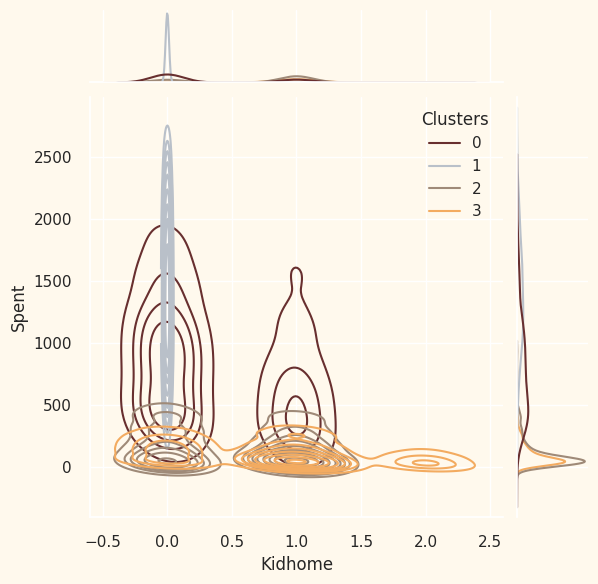

<Figure size 800x550 with 0 Axes>

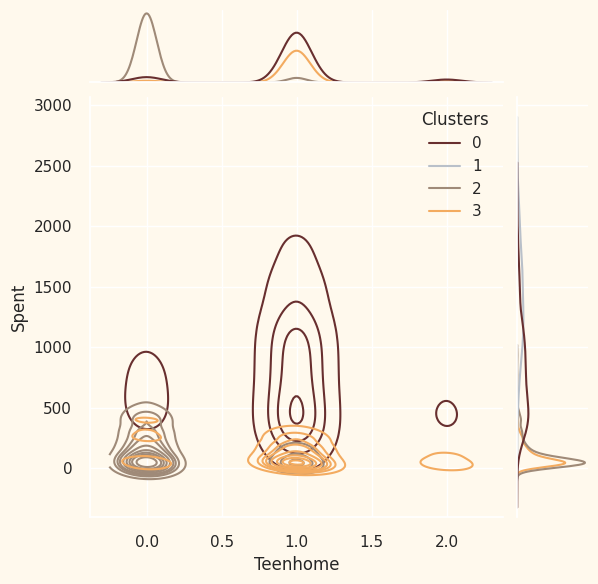

<Figure size 800x550 with 0 Axes>

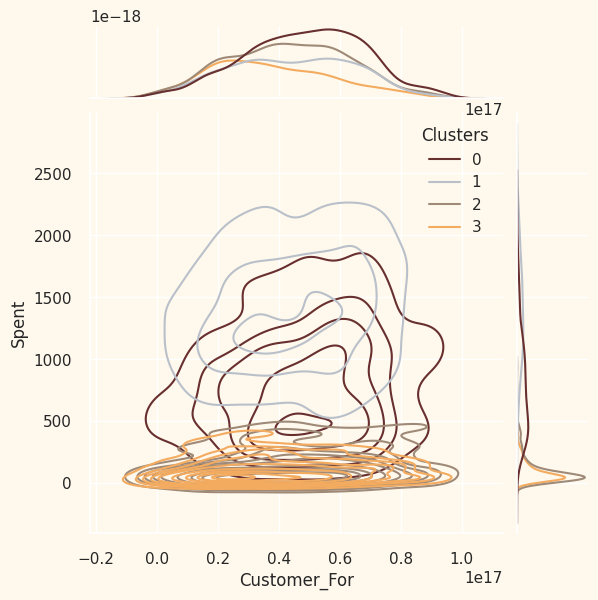

<Figure size 800x550 with 0 Axes>

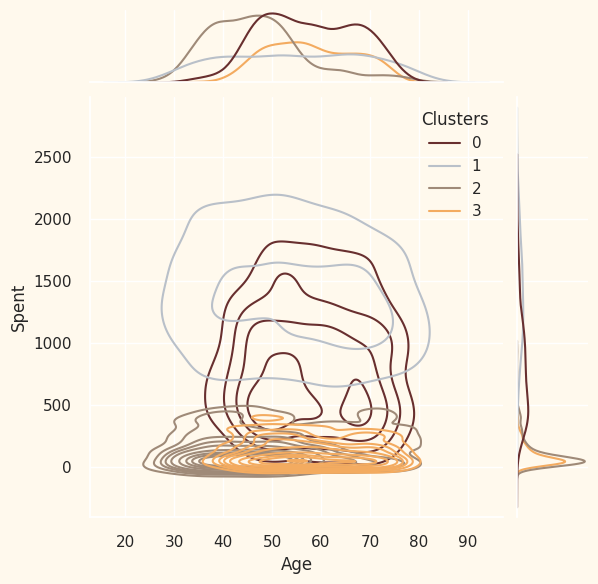

<Figure size 800x550 with 0 Axes>

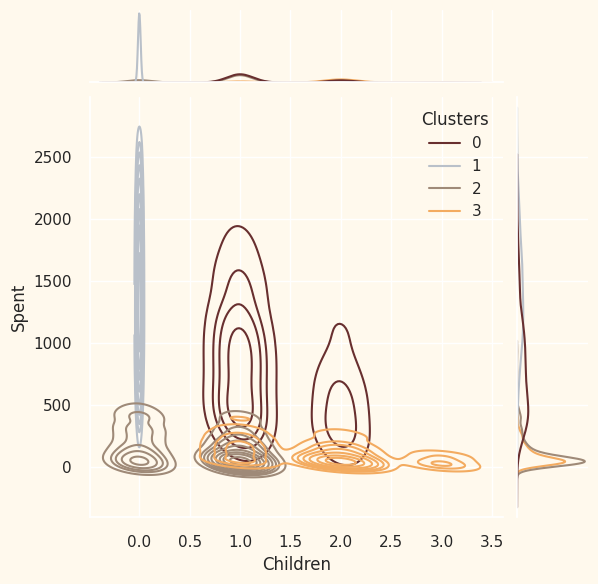

<Figure size 800x550 with 0 Axes>

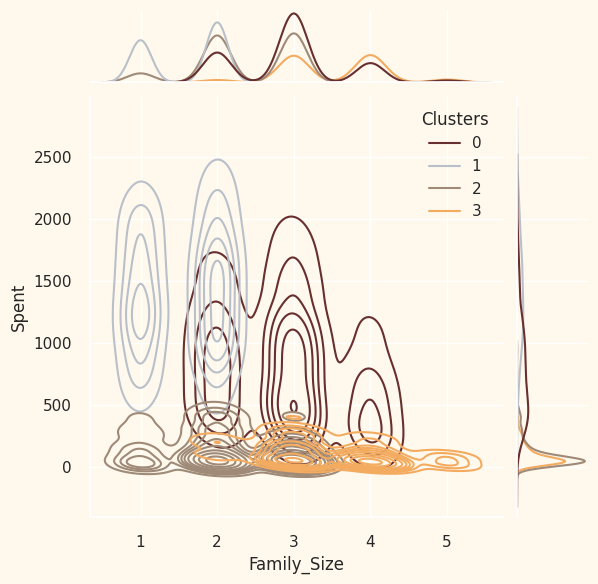

<Figure size 800x550 with 0 Axes>

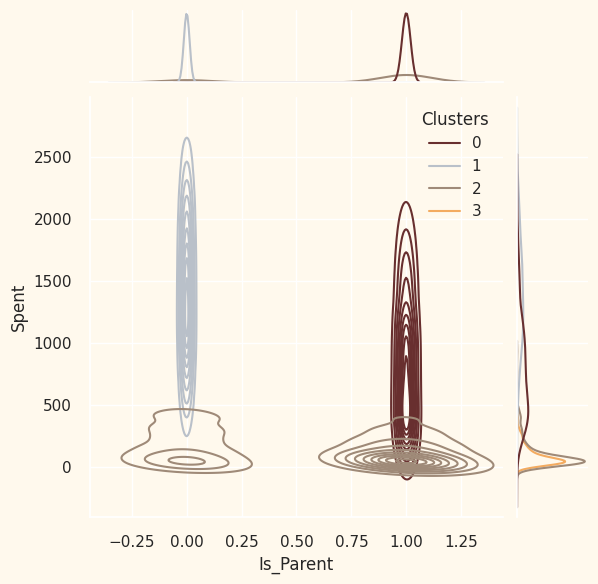

<Figure size 800x550 with 0 Axes>

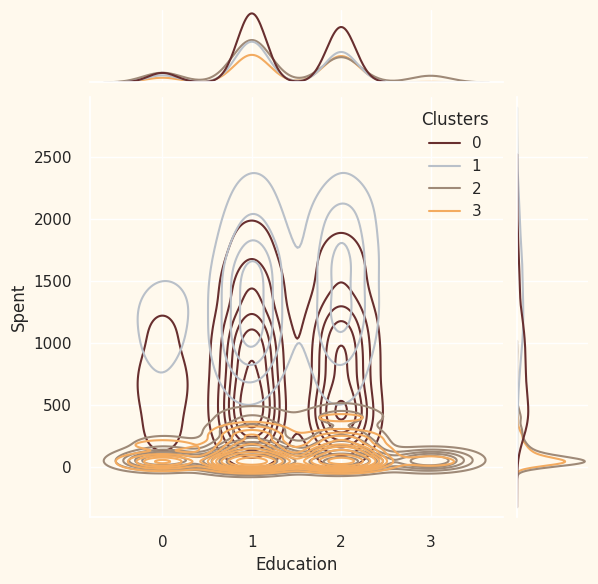

<Figure size 800x550 with 0 Axes>

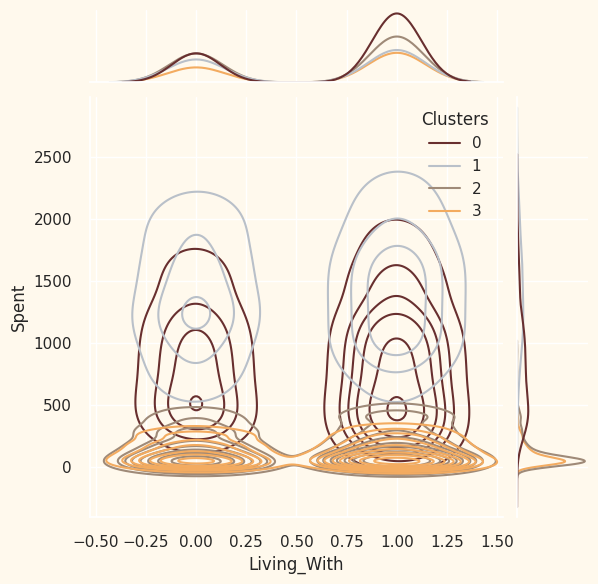

In [ ]:
Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size",\
            "Is_Parent", "Education", "Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], kind="kde", palette=palette)
    plt.show()

In conclusion, here is a summary of the profiles for each cluster:

Cluster Number: 0

* They are definitely parents.
* The family size ranges from 2 to 4 members.
* This group includes single parents.
* Most of them have a teenager at home.
* They are relatively older in age.

Cluster Number: 1

* They are definitely not parents.
* The family size is limited to a maximum of 2 members.
* There is a slightly higher proportion of couples compared to single individuals.
* They cover a wide range of ages.
* This group belongs to the high-income category.

Cluster Number: 2

* The majority of individuals in this cluster are parents.
* The family size ranges from 2 to 3 members.
* They mainly have one child (not typically teenagers).
* They are relatively younger in age.

Cluster Number: 3

* They are definitely parents.
* The family size ranges from 2 to 5 members.
* A majority of them have a teenager at home.
* They are relatively older in age.
* This group belongs to the lower-income category.

In this case, we performed unsupervised clustering. We utilized dimensionality reduction followed by agglomerative clustering. We obtained 4 clusters and further used them to create customer profiles within each cluster based on their family structure and income/spending patterns.

This information can be valuable in planning better marketing strategies!